In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import plotnine as gg
from plotnine import *
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from sklearn.manifold import TSNE
from palettable.colorbrewer.sequential import *



# Principle Component Analysis

In [57]:
path = '/Users/habbasi/Desktop/050919_Nathianel_Gray/collated/'
file = os.path.join(path, 'C-7210-01-CMP-008-gray_collapsed_sampled.csv')

#Importing data 

df = pd.read_csv(file)


#Parsing Metadata columns
metadata_columns = df.columns.str.contains("Metadata")
#metadata = df.loc[:, metadata_columns]
# Taking all the value of of variables excluding Metadata 
x = df.loc[:, ~metadata_columns].values
y = df.Metadata_compound_name.values
y_df = pd.DataFrame(df[['Metadata_compound_name', 'Metadata_cell_line', 'Metadata_Annotation']])


In [58]:
# Fit and transform with t-SNE

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, learning_rate=100, n_iter=1000, perplexity=30)


#Project the data in 2D 
x_2d = model.fit_transform(x)

test = pd.DataFrame(x_2d, columns= ['t-SNE-1', 't-SNE-2'])

combined = test.merge(y_df, left_index=True, right_index=True)
combined.head()


,t-SNE-1,t-SNE-2,Metadata_compound_name,Metadata_cell_line,Metadata_Annotation
0,-9.419876,-21.981482,DMSO,A549,control
1,-3.453699,-22.071918,DMSO,A549,control
2,-3.431545,-20.321117,DMSO,A549,control
3,-13.609779,-23.351067,DMSO,A549,control
4,-15.865976,-21.389984,DMSO,A549,control


/Users/habbasi/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/habbasi/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /Users/habbasi/Desktop/Gray_project_t-SNE.pdf
  warn('Filename: {}'.format(filename))


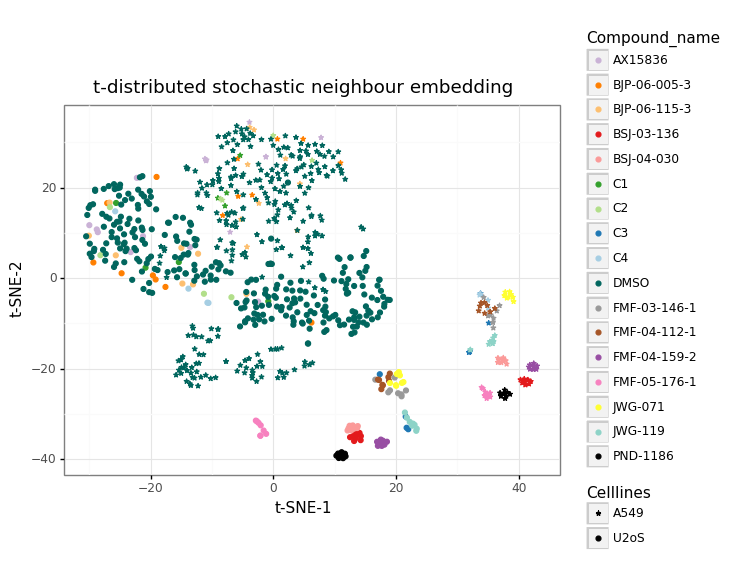

<ggplot: (-9223372029292196755)>

In [66]:
p = gg.ggplot(combined, gg.aes(x='t-SNE-1', y='t-SNE-2', color='Metadata_compound_name', label='Metadata_compound_name', shape='Metadata_cell_line')) + \
    gg.geom_point() + \
    gg.theme_bw() + \
    gg.xlab("t-SNE-1") + \
    gg.ylab("t-SNE-2") + \
    gg.ggtitle("t-distributed stochastic neighbour embedding") + \
    gg.scale_colour_manual(name= 'Compound_name', values=["#cab2d6", "#ff7f00", "#fdbf6f", "#e31a1c",
                                                         "#fb9a99", "#33a02c","#b2df8a", "#1f78b4",
                                                         "#a6cee3", "#01665e", "#999999", "#a65628",
                                                         "#984ea3", "#f781bf", "#ffff33", "#8dd3c7",
                                                         "#000000"]) + \
    gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])

    

ggsave(filename='Gray_project_t-SNE.pdf', plot = p, path = '/Users/habbasi/Desktop/')
    
p
